#### Edwin Villafane
##### CISB62 Final Project - Forecasting Website Page Loads
##### Dataset link: https://www.kaggle.com/datasets/bobnau/daily-website-visitors
#### Github link: https://github.com/edwinvillafane/cisb62-final

In this project I will try to forecast the last 200 days worth of Page Loads using historical data. The data used contains 5 years of daily time series data for several measures of traffic on a statistical forecasting teaching notes website whose alias is statforecasting.com. In this notebook, I go through EDA, data preprocessing and build two deep learning models, LSTM and ANN, optimize the models and make a final forecast. 


EDA

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
from matplotlib import rcParams 
import warnings
warnings.filterwarnings('ignore')



2023-12-07 00:05:15.045208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv('daily-website-visitors.csv', thousands=',')

In [4]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236


In [5]:
df = df[['Date', 'Page.Loads']]

In [6]:
df.head()

,Date,Page.Loads
0,9/14/2014,2146
1,9/15/2014,3621
2,9/16/2014,3698
3,9/17/2014,3667
4,9/18/2014,3316


In [20]:
df.info() # no nulls!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2167 non-null   object
 1   Page.Loads  2167 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.0+ KB


In [19]:
df.describe()

,Page.Loads
count,2167.000000
mean,4116.989386
std,1350.977843
min,1002.000000
25%,3114.500000
50%,4106.000000
75%,5020.500000
max,7984.000000


As mentioned in the data link, there is a very seasonal pattern to this data meaning that a model should be able to predict future values with good confidence.

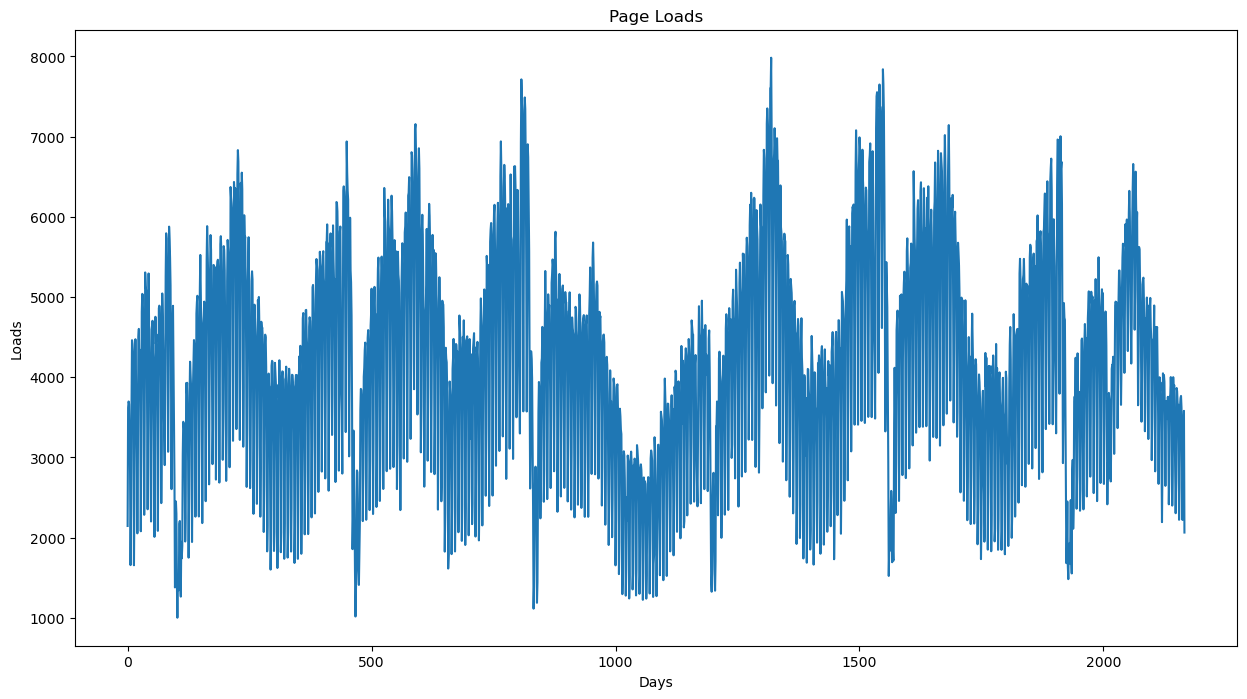

In [7]:
plt.figure(figsize=(15,8))
plt.plot(df["Page.Loads"])
plt.title('Page Loads')
plt.ylabel('Loads')
plt.xlabel('Days')
plt.show()

#### LSTM Model Approach (Pt2 )
In order to forecast the last 200 days' Page Loads, I have to first load and preprocess the data. The 'Page.Loads' column was scaled using Min-Max scaling to bring values between 0 and 1. To build a deep learning model, I needed to create input sequences for the LSTM model of length 200 (sequence_length). The input sequences (X_train) and corresponding output values (y_train) are prepared.

My model is a multilayer sequential model with two LSTM layers with neurons units are used. The first LSTM layer returns sequences, and the second does not. Two Dense layers are added, with the last one having a single neuron for regression. The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss.

The model is trained using the prepared training data (X_train and y_train). Training is performed over 30 epochs with a batch size of 50. The training and validation loss history is stored for later visualization. The trained model is used to predict the next values in the time series (predictions). Predictions are inverse-transformed to the original scale using the Min-Max scaler to ensure we can see the predictions alongside the actual values.

Reasons why I build the model architecture
LSTMs are chosen for handling sequential/temporal patterns in time series data. The model uses two LSTM layers to capture and learn complex patterns in the data. Dense layers at the end help in making the final predictions. The Adam optimizer is used for efficient optimization, and Mean Squared Error is used as the loss function for regression tasks. This architecture is a common choice for time series forecasting with LSTMs, and it's effective for capturing dependencies in sequential data. The number of neurons, sequence length, and other hyperparameters can be tuned based on the specific characteristics of the data.

### ANN model approach (Pt1)
I also built an ANN (artificial neural network) model which follows basically the same logical strucutre as the LSTM model in creating training/testing data. The model architecture consists of three Dense layers. The first layer has 50 neurons with a ReLU activation function, the second layer has 25 neurons with a ReLU activation function, and the third layer has 1 neuron for regression. The input dimension of the first layer matches the number of features in the input data. The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss. Once the model is built, the model is trained using the same number of epochs and batch size. The trained model is then used to predict the values of the 200 days in our testing window and I create plots to see how well the model performs on the test inputs.

Reasons why I build the model architecture. This architecture is a simple feedforward neural network suitable for regression tasks. ReLU activation functions are used to introduce non-linearity and capture complex patterns in the data. The number of neurons and layers is relatively small, making the model less complex. Adam optimizer and Mean Squared Error (MSE) loss are chosen for efficient optimization and suitability for regression tasks. The chosen architecture is more straightforward compared to the LSTM model and is suitable for tasks where sequential dependencies may not be as crucial. It's a trade-off between complexity and the nature of the data.

2023-12-07 00:05:23.696572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
32/32 [==============================] - 11s 205ms/step - loss: 0.0016 - val_loss: 2.2953e-05
Epoch 2/30
32/32 [==============================] - 6s 177ms/step - loss: 2.6380e-05 - val_loss: 2.2569e-06
Epoch 3/30
32/32 [==============================] - 6s 185ms/step - loss: 1.0838e-06 - val_loss: 1.6466e-07
Epoch 4/30
32/32 [==============================] - 6s 177ms/step - loss: 3.3927e-08 - val_loss: 9.5700e-09
Epoch 5/30
32/32 [==============================] - 6s 178ms/step - loss: 2.0577e-09 - val_loss: 8.6767e-10
Epoch 6/30
32/32 [==============================] - 6s 188ms/step - loss: 7.6799e-10 - val_loss: 4.9168e-10
Epoch 7/30
32/32 [==============================] - 6s 178ms/step - loss: 6.9250e-10 - val_loss: 4.7284e-10
Epoch 8/30
32/32 [==============================] - 6s 195ms/step - loss: 6.6945e-10 - val_loss: 4.9573e-10
Epoch 9/30
32/32 [==============================] - 6s 180ms/step - loss: 6.7353e-10 - val_loss: 4.8179e-10
Epoch 10/30
32/32 [============

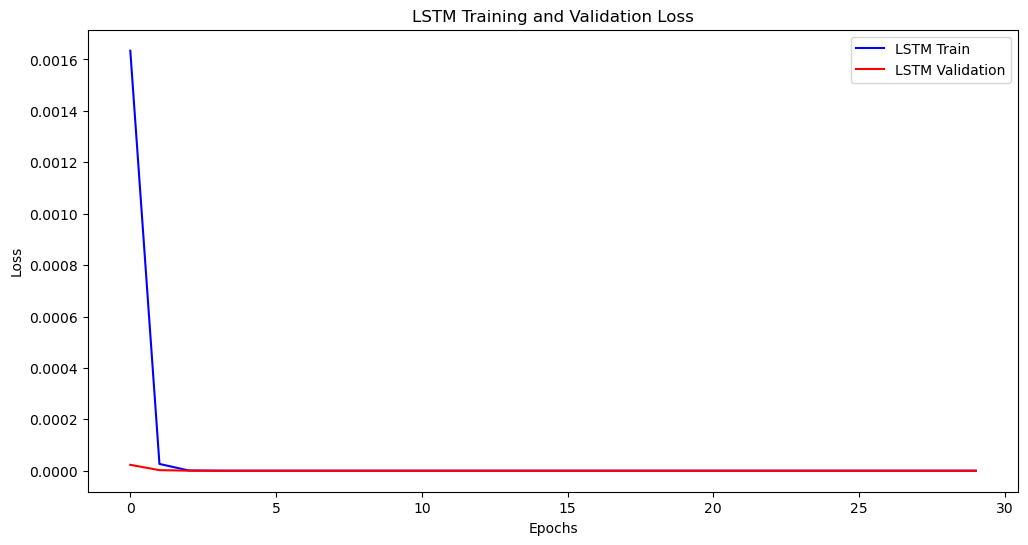

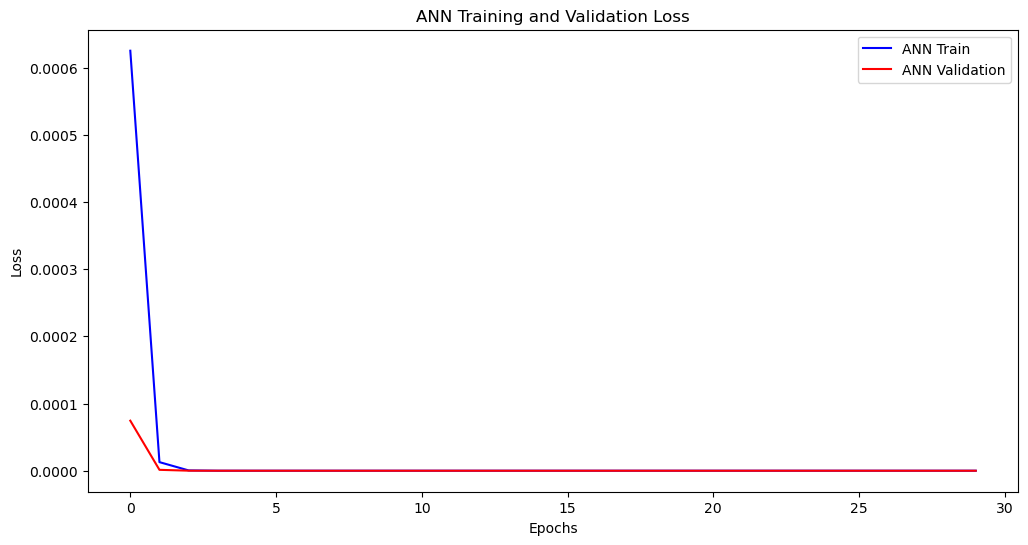

7/7 [==============================] - 0s 2ms/step


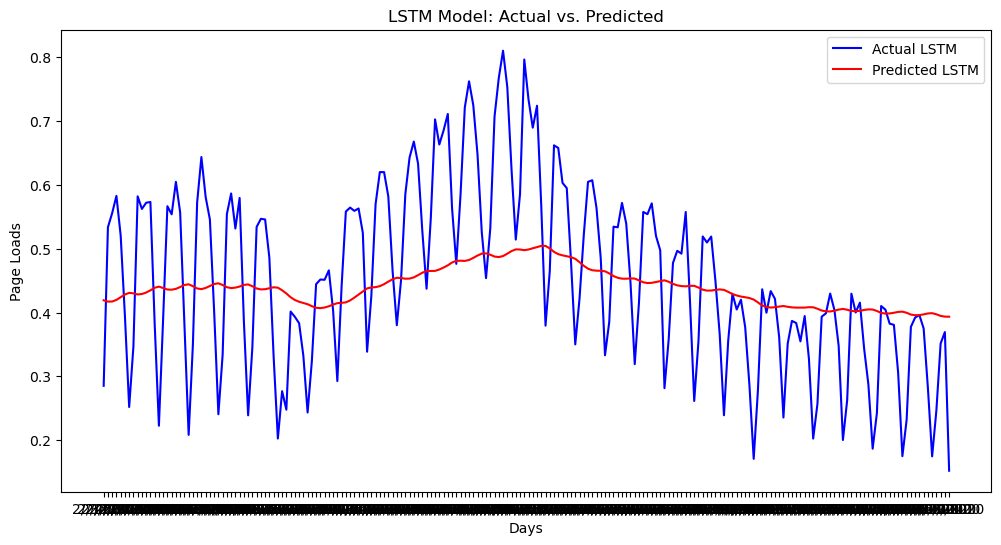

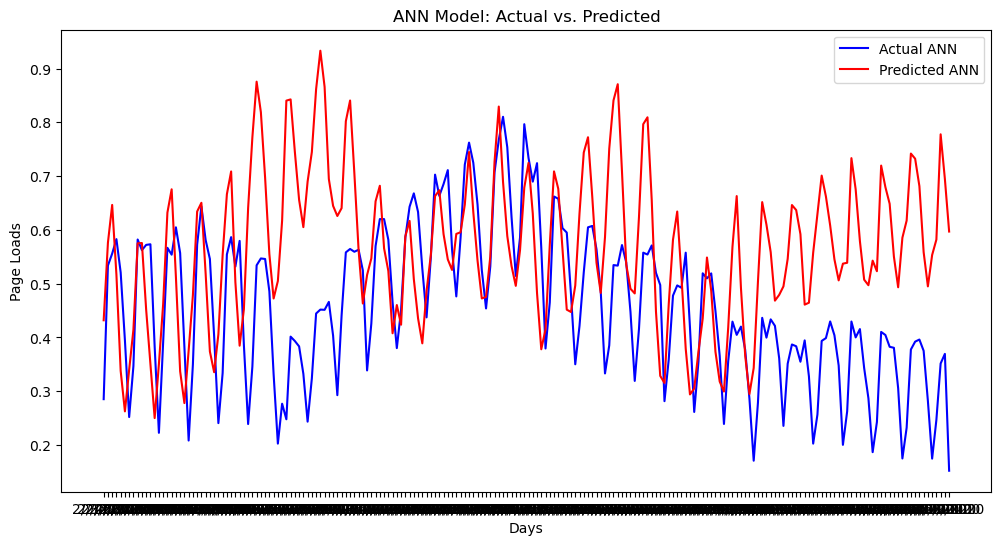

In [8]:
df = pd.read_csv('daily-website-visitors.csv', thousands=',', usecols=['Date', 'Page.Loads'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Page.Loads']])
walmart_training_processed = pd.DataFrame(data=scaled_data, index=df['Date'], columns=['Page.Loads'])

# create training data
sequence_length = 200
walmart_training_scaled = scaler.transform(walmart_training_processed)

X_train_lstm = np.array([walmart_training_scaled[i-sequence_length:i, 0] for i in range(sequence_length, len(walmart_training_scaled))])
y_train_lstm = walmart_training_scaled[sequence_length:, 0]

X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))

# define LSTM model
neurons_lstm = 50
model_lstm = Sequential([
    LSTM(neurons_lstm, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(neurons_lstm, return_sequences=False),
    Dense(25),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, validation_split=0.2, epochs=30, verbose=1, batch_size=50)

# create training data for ANN
X_train_ann = np.array([walmart_training_scaled[i-sequence_length:i, 0] for i in range(sequence_length, len(walmart_training_scaled))])
y_train_ann = walmart_training_scaled[sequence_length:, 0]

X_train_ann = np.reshape(X_train_ann, (X_train_ann.shape[0], X_train_ann.shape[1]))

# create ANN model
model_ann = Sequential([
    Dense(50, input_dim=X_train_ann.shape[1], activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

model_ann.compile(optimizer='adam', loss='mse')
history_ann = model_ann.fit(X_train_ann, y_train_ann, validation_split=0.2, epochs=30, verbose=1, batch_size=50)

# plot loss for LSTM model
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], 'b', label='LSTM Train')
plt.plot(history_lstm.history['val_loss'], 'r', label='LSTM Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()

# plot loss for ANN model
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['loss'], 'b', label='ANN Train')
plt.plot(history_ann.history['val_loss'], 'r', label='ANN Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Training and Validation Loss')
plt.legend()
plt.show()

# create predictions for LSTM
X_test_lstm = np.array([walmart_training_scaled[i-sequence_length:i, 0] for i in range(len(walmart_training_scaled)-sequence_length, len(walmart_training_scaled))])
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

predictions_lstm = scaler.inverse_transform(model_lstm.predict(X_test_lstm))

# create predictions for ANN
X_test_ann = np.array([walmart_training_scaled[i-sequence_length:i, 0] for i in range(len(walmart_training_scaled)-sequence_length, len(walmart_training_scaled))])
X_test_ann = np.reshape(X_test_ann, (X_test_ann.shape[0], X_test_ann.shape[1]))

predictions_ann = scaler.inverse_transform(model_ann.predict(X_test_ann))

# plot actual vs predictions for  LSTM
plt.figure(figsize=(12, 6))
plt.plot(walmart_training_processed.index[-len(predictions_lstm):], walmart_training_processed.iloc[-len(predictions_lstm):, 0], 'b', label='Actual LSTM')
plt.plot(walmart_training_processed.index[-len(predictions_lstm):], predictions_lstm, 'r', label='Predicted LSTM')
plt.xlabel('Days')
plt.ylabel('Page Loads')
plt.title('LSTM Model: Actual vs. Predicted')
plt.legend()
plt.show()

# plot actual vs predictions for ANN
plt.figure(figsize=(12, 6))
plt.plot(walmart_training_processed.index[-len(predictions_ann):], walmart_training_processed.iloc[-len(predictions_ann):, 0], 'b', label='Actual ANN')
plt.plot(walmart_training_processed.index[-len(predictions_ann):], predictions_ann, 'r', label='Predicted ANN')
plt.xlabel('Days')
plt.ylabel('Page Loads')
plt.title('ANN Model: Actual vs. Predicted')
plt.legend()
plt.show()


In order to properly compare the two models we need a common comparison metric, in this case RMSE or root mean square error.

In [12]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(predictions, actuals):
    return np.sqrt(mean_squared_error(predictions, actuals))

In [13]:
rmse_lstm = calculate_rmse(predictions_lstm, walmart_training_processed.iloc[-len(predictions_lstm):, 0])
print(f"RMSE for LSTM Model: {rmse_lstm}")

rmse_ann = calculate_rmse(predictions_ann, walmart_training_processed.iloc[-len(predictions_ann):, 0])
print(f"RMSE for ANN Model: {rmse_ann}")

RMSE for LSTM Model: 0.12846276089985606
RMSE for ANN Model: 0.20522041917915362


Using the RMSE as a comparison metric it appears that the LSTM does a slightly better job at predicting the values for the testing period. And if we look at the graphs plotting actuals vs predictions we see that the LSTM model follows the trend much more closely and conservatively while the ANN captures the ups and downs better, but the gap between actual and predicted is larger.

Deep learning PT 3
We can do hyperparameter tuning to try to improve both models and hopefully get a model that is able to better make predictions. For this project I will be trying to find the optimal number of neurons in both models and then comparing them again using RMSE.

In [15]:
def create_lstm_model(neurons=50):
    model = Sequential([
        LSTM(neurons, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
        LSTM(neurons, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_ann_model(neurons=50):
    model = Sequential([
        Dense(neurons, input_dim=X_train_ann.shape[1], activation='relu'),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model



# hyperparameter tuning for LSTM
lstm_model = KerasRegressor(build_fn=create_lstm_model, epochs=30, batch_size=50, verbose=0)
param_grid_lstm = {'neurons': [50, 100, 150]}

grid_lstm = GridSearchCV(estimator=lstm_model, param_grid=param_grid_lstm, scoring='neg_mean_squared_error', cv=3)
grid_lstm_result = grid_lstm.fit(X_train_lstm, y_train_lstm)

print("Best LSTM Parameters: ", grid_lstm_result.best_params_)

# hyperparameter tuning for ANN
ann_model = KerasRegressor(build_fn=create_ann_model, epochs=30, batch_size=50, verbose=0)
param_grid_ann = {'neurons': [50, 100, 150]}

grid_ann = GridSearchCV(estimator=ann_model, param_grid=param_grid_ann, scoring='neg_mean_squared_error', cv=3)
grid_ann_result = grid_ann.fit(X_train_ann, y_train_ann)

print("Best ANN Parameters: ", grid_ann_result.best_params_)


Best LSTM Parameters:  {'neurons': 50}
Best ANN Parameters:  {'neurons': 50}


Now that we know the best number of neurons for each model, let's build a final LSTM and ANN model.

In [16]:
best_lstm_neurons = grid_lstm_result.best_params_['neurons']
final_lstm_model = create_lstm_model(neurons=best_lstm_neurons)
final_lstm_model.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=50, verbose=1)

best_ann_neurons = grid_ann_result.best_params_['neurons']
final_ann_model = create_ann_model(neurons=best_ann_neurons)
final_ann_model.fit(X_train_ann, y_train_ann, epochs=30, batch_size=50, verbose=1)


Epoch 1/30
40/40 [==============================] - 11s 161ms/step - loss: 0.0012
Epoch 2/30
40/40 [==============================] - 6s 157ms/step - loss: 8.2367e-06
Epoch 3/30
40/40 [==============================] - 6s 158ms/step - loss: 1.7093e-07
Epoch 4/30
40/40 [==============================] - 7s 163ms/step - loss: 2.9248e-09
Epoch 5/30
40/40 [==============================] - 6s 161ms/step - loss: 6.5568e-10
Epoch 6/30
40/40 [==============================] - 6s 160ms/step - loss: 5.9632e-10
Epoch 7/30
40/40 [==============================] - 6s 160ms/step - loss: 6.0764e-10
Epoch 8/30
40/40 [==============================] - 7s 162ms/step - loss: 5.9950e-10
Epoch 9/30
40/40 [==============================] - 6s 159ms/step - loss: 5.9839e-10
Epoch 10/30
40/40 [==============================] - 6s 156ms/step - loss: 6.1924e-10
Epoch 11/30
40/40 [==============================] - 6s 161ms/step - loss: 6.1497e-10
Epoch 12/30
40/40 [==============================] - 6s 160ms/step

7/7 [==============================] - 0s 2ms/step


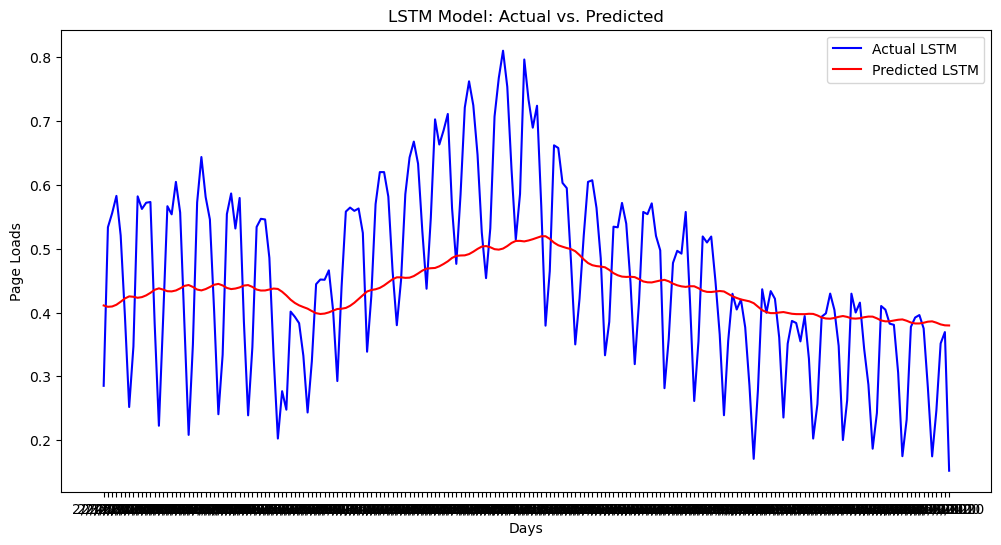

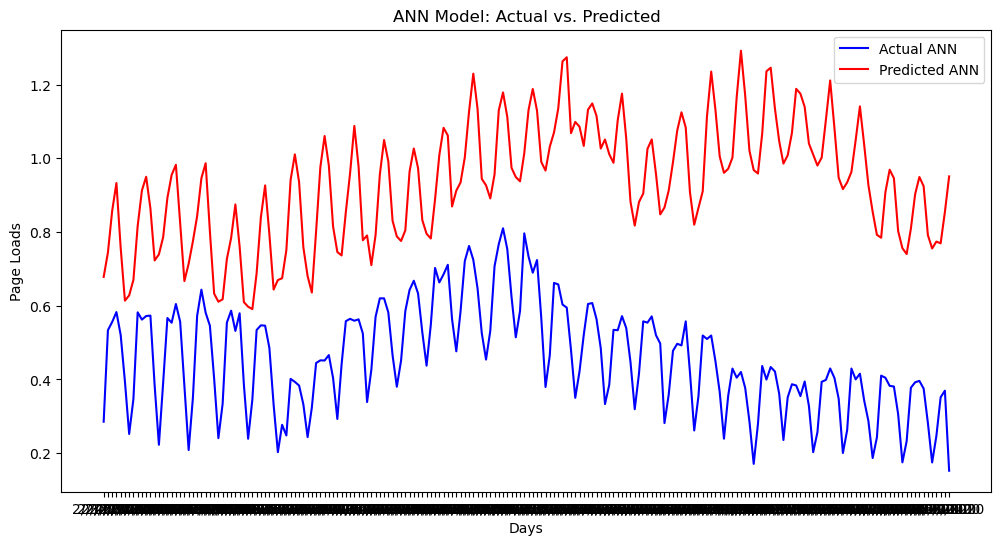

RMSE for LSTM Model: 0.12537153106373908
RMSE for ANN Model: 0.5043665238325592


In [17]:
# creating testing dataset and predictions for best LSTM model
X_test_lstm = np.array([walmart_training_scaled[i-sequence_length:i, 0] for i in range(len(walmart_training_scaled)-sequence_length, len(walmart_training_scaled))])
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

predictions_lstm = scaler.inverse_transform(final_lstm_model.predict(X_test_lstm))

# creating testing dataset and predictions for best ANN model
X_test_ann = np.array([walmart_training_scaled[i-sequence_length:i, 0] for i in range(len(walmart_training_scaled)-sequence_length, len(walmart_training_scaled))])
X_test_ann = np.reshape(X_test_ann, (X_test_ann.shape[0], X_test_ann.shape[1]))

predictions_ann = scaler.inverse_transform(final_ann_model.predict(X_test_ann))

# actual vs predicted for best LSTM
plt.figure(figsize=(12, 6))
plt.plot(walmart_training_processed.index[-len(predictions_lstm):], walmart_training_processed.iloc[-len(predictions_lstm):, 0], 'b', label='Actual LSTM')
plt.plot(walmart_training_processed.index[-len(predictions_lstm):], predictions_lstm, 'r', label='Predicted LSTM')
plt.xlabel('Days')
plt.ylabel('Page Loads')
plt.title('LSTM Model: Actual vs. Predicted')
plt.legend()
plt.show()

# actual vs predicted for best ANN
plt.figure(figsize=(12, 6))
plt.plot(walmart_training_processed.index[-len(predictions_ann):], walmart_training_processed.iloc[-len(predictions_ann):, 0], 'b', label='Actual ANN')
plt.plot(walmart_training_processed.index[-len(predictions_ann):], predictions_ann, 'r', label='Predicted ANN')
plt.xlabel('Days')
plt.ylabel('Page Loads')
plt.title('ANN Model: Actual vs. Predicted')
plt.legend()
plt.show()

# RMSE calculations
rmse_lstm = calculate_rmse(predictions_lstm, walmart_training_processed.iloc[-len(predictions_lstm):, 0])
print(f"RMSE for LSTM Model: {rmse_lstm}")

rmse_ann = calculate_rmse(predictions_ann, walmart_training_processed.iloc[-len(predictions_ann):, 0])
print(f"RMSE for ANN Model: {rmse_ann}")

In the optimized models, the LSTM model is able to better capture the trend of the data while staying in the middle of both extremes of the actual data. On the other hand, the ANN model consistently gets the patterns (ups and downs), but overshoots by a lot causing the error to be larger. Overall, the LSTM performed better.

There are a couple of ideas that I would love to explore if I have more time: exploring more sophisticated archtectures for both models, ie adding more layers and perhaps add addtional features, such as day of week, to see if that impacts forecasting accuracy.
